<User username:cwalts@esri.com>
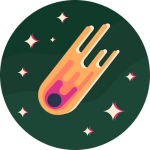

In [1]:
import arcgis
from arcgis.gis import GIS
from arcgis.raster import ImageryLayer

gis = GIS("Pro")
gis.users.me

In [ ]:
base_imagery = ImageryLayer("#", gis=gis)
test_imagery = ImageryLayer("#", gis=gis)

In [3]:
# Set the parameters for the benchmark
GEOMETRY = {"spatialReference":{"wkid":4326},"x":-103.3665440972982,"y":0.995054807838955}
GEOMETRY_TYPE = "point"
MOSAIC_RULE = {"ascending":True,"multidimensionalDefinition":[{"variableName":"heatmax_ssp126","dimensionName":"StdTime","values":[[-628560000000,249868800000]],"isSlice":False},{"variableName":"heatmax_ssp245","dimensionName":"StdTime","values":[[-628560000000,249868800000]],"isSlice":False}]}
RETURN_FIRST_VALUE = False
INTERPOLATION = "RSP_NearestNeighbor"

In [4]:
def benchmark_imagery_layer(imagery_layer, parameters):
    return imagery_layer.get_samples(geometry=parameters[0], geometry_type=parameters[1], mosaic_rule=parameters[2], return_first_value_only=parameters[3], interpolation=parameters[4])

In [5]:
def benchmark_report(benchmark_output):
    print(
f'''
Out of {benchmark_output.repeat} runs, {benchmark_output.loops} loops each...

 Average   Best   Worst   stdev
|-------|-------|-------|-------|
| {round(benchmark_output.average, 3)} | {round(benchmark_output.best, 3)} | {round(benchmark_output.worst, 3)} | {round(benchmark_output.stdev, 3)} | seconds
''')
    return 

In [ ]:
base_output = %timeit -o -r 10 -n 10 benchmark_imagery_layer(base_imagery, [GEOMETRY, GEOMETRY_TYPE, MOSAIC_RULE, RETURN_FIRST_VALUE, INTERPOLATION])
benchmark_report(base_output)

47.1 ms ± 6.87 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)

Out of 10 runs, 10 loops each...

 Average   Best   Worst   stdev
|-------|-------|-------|-------|
| 0.047 | 0.043 | 0.065 | 0.007 | seconds



In [ ]:
test_output = %timeit -o -r 10 -n 10 benchmark_imagery_layer(test_imagery, [GEOMETRY, GEOMETRY_TYPE, MOSAIC_RULE, RETURN_FIRST_VALUE, INTERPOLATION])
benchmark_report(test_output)

257 ms ± 81 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)

Out of 10 runs, 10 loops each...

 Average   Best   Worst   stdev
|-------|-------|-------|-------|
| 0.257 | 0.146 | 0.405 | 0.081 | seconds

